## The purpose of this Sprint

<li> Understanding logistic regression through scratch </li>
<li> Learn the basics about classification problems </li>

## How to learn

After implementing Logistic Regression with scratch, we will do learning and verification.

## Import libraries

In [341]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import pickle

In [342]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## 2. Scratch Logistic Regression

We will create a class for logistic regression from scratch. We will implement the algorithm using only the minimum library such as NumPy.


Below is a template. Add code to this ScratchLogisticRegression class. Unlike linear regression, there are two methods for estimating relations: a predict method that outputs a label and a predict_proba method that outputs a probability.

```
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.verbose:
            #Output learning process when verbose is set to True
            print()
        pass

    def predict(self, X):
        """
        Estimate the label using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        pass
        return
    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        pass
        return
```

In [343]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.no_bias is not True:
            x1 = self._linear_hypothesis(X)
            self.theta = np.random.random(x1.shape[1])
        else:
            x1 = X
            self.theta = np.random.random(x1.shape[1])
            
        for i in range(self.iter):
            y1 = self.sigmoid_function(np.dot(x1,self.theta.T))
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            if X_val is not None:
                if self.no_bias is not True:
                    x2 = self._linear_hypothesis(X_val)
                else:
                    x2 = X_val
                y2 = self.sigmoid_function(np.dot(x2,self.theta))
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2
            
            self._gradient_descent(x1,error)
                
            if self.verbose:
                #Output learning process when verbose is set to True
                print('n_iter',i,
                    'loss',self.loss[i],
                    'weight',self.theta)

    def predict(self, X):
        """
        Estimate the label using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if self.no_bias is not True:
            return np.round(self.sigmoid_function(np.dot(self._linear_hypothesis(X),self.theta)))
        return np.round(self.sigmoid_function(np.dot(X,self.theta)))
    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if self.no_bias is not True:
            return self.sigmoid_function(np.dot(self._linear_hypothesis(X),self.theta))
        return self.sigmoid_function(np.dot(X,self.theta))
    def _gradient_descent(self,X,error):
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)
    def sigmoid_function(self,z):
        return 1/(1+np.exp(-z))    
    def _linear_hypothesis(self,X):
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)
        return np.concatenate([x0, x1],axis=1)
    def getWeight(self):
        return self.theta

In [344]:
iris = load_iris()

In [345]:
X = iris.data 
target = iris.target
names = iris.target_names

In [346]:
df = pd.DataFrame(X, columns=iris.feature_names)

In [347]:
df = df.set_axis(['sl', 'sw', 'pl','pw'], axis='columns')

In [348]:
df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [349]:
df['species'] = iris.target

In [350]:
df.head(100)

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [351]:
df['species'].unique()

array([0, 1, 2])

In [352]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [353]:
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Remove setosa class

In [354]:
df = df[df['species']!=0]
len(df)

100

In [355]:
df['species'] = df['species'].replace(to_replace= [1, 2], value = [0, 1])

In [356]:
df

,sl,sw,pl,pw,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [357]:
X = df.iloc[:,:-1]
print("Length X:",len(X))
X.head()

Length X: 100


,sl,sw,pl,pw
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [358]:
Y = df.iloc[:,-1]
print("Length Y: ",len(Y))
Y.head()

Length Y:  100


50    0
51    0
52    0
53    0
54    0
Name: species, dtype: int64

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),Y.to_numpy(),test_size = 0.25)

In [360]:
print("X_train_trans.shape:", X_train.shape)
print("X_test_trans.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train_trans.shape: (75, 4)
X_test_trans.shape: (25, 4)
y_train.shape: (75,)
y_test.shape: (25,)


In [361]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [362]:
print(X_train_trans.shape)
print(y_train.shape)
print(X_test_trans.shape)
print(y_test.shape)

(75, 4)
(75,)
(25, 4)
(25,)


## Problem 1: Hypothetical function
Please implement the method of logistic regression assumption function in ScratchLogisticRegression class.


The assumed function for logistic regression is the assumed function for linear regression passed through the Sigmoid function. The sigmoid function is represented by the following equation

<center> $g(z) = \frac{1}{1 + e^{-z}}$ </center>
 
 The linear regression hypothesis function was:
 
 <center> $ h_{\theta}(x) = \theta^{T}.x $</center>

 Put together, the logistic regression assumption function is
 
 <center> $ h_{\theta} = \frac{1}{1 + e^{-\theta^{T}.x}}  $</center>
 
 Consider the following equation where
 
***x***: Feature vector

***θ***: Parameter (weight) vector

## Problem 2: Steepest descent
Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and
Please it call from the fit method.

![alt text](fitMethod.png "Fit Method")

***α***:Learning rate

***i***:Sample index

***j***:Feature index

***m***:Number of data entered

***$h_\theta$***:Hypothtical function

Consider the following equation where 

***x***:Feature vector

***$\theta$***:Parameter(weight) vector

***$x(i)$***: Feature vector of i-th sample

***$y(i)$***: Correct asnwer label of i-th sample

***$ \theta_{j}$***: jth parameter(weight)

***$ \lambda $***: Regularization parameter

The above formula contains a regularization term. Regularization terms are used to prevent overfitting. It is an intercept 
θ
​ ​
0
Is not included in the regularization term so that the coefficients for features, excluding the intercept, can be discussed from the same point of view.

## Problem 3: Estimated
Please implement the estimation mechanism. Add to the predict method and predict_proba method included in the template of ScratchLogisticRegression class.

Hypothetical function
h
θ
(
x
)
The output of is the return value of predict_proba, and the value is labeled as 1 and 0 with a threshold value, which is the return value of predict.

## Problem 4: Objective function
Implement the Objective function (loss function) of the logistic regression expressed in the following formula And make sure that this is recorded inself.loss, self.val_loss .


Note that this formula contains a regularization term.


*If you cannot see the formula, please see DIVER full screen.

![alt text](objectiveFunction.png "Object tive function")

***m***: Number of data entered

***h​ ​θ​ ​(​ ​)***: Hypothetical function

***θ***:Parameter (weight) vector

***x​ ​(​ ​i​ ​)***: Feature vector of i-th sample

***y​ ​(​ ​i​ ​)***:Correct answer label of i-th sample

***θ​ ​j***: jth parameter (weight)
 
 
Silhouette factor

***n***: Number of features
 
***λ***: Regularization parameter

## Problem 5: Learning and estimation
Learn and estimate the scratch implementation for the binary classification of virgicolor and virginica in the iris data set provided in the Introduction to Scratch Machine Learning Sprint.


Compare this with the scikit-learn implementation and see if it works correctly.


Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [399]:
my_model = ScratchLogisticRegression(1000,0.02,False,True)

In [400]:
my_model.fit(X_train_trans,y_train,X_test_trans,y_test)

n_iter 0 loss 0.046246028564086356 weight [0.25196681 0.73826353 0.17963304 0.52331139 0.91312316]
n_iter 1 loss 0.046149613118377494 weight [0.25100662 0.73789641 0.1791384  0.52500851 0.91559778]
n_iter 2 loss 0.046053692949809315 weight [0.25005047 0.73752754 0.17864276 0.52670095 0.91806645]
n_iter 3 loss 0.04595826389968233 weight [0.24909834 0.73715696 0.17814613 0.52838874 0.92052919]
n_iter 4 loss 0.04586332186166199 weight [0.24815021 0.73678467 0.17764854 0.53007191 0.92298604]
n_iter 5 loss 0.04576886278089363 weight [0.24720605 0.7364107  0.17714999 0.53175049 0.92543702]
n_iter 6 loss 0.045674882653135705 weight [0.24626584 0.73603507 0.17665051 0.53342451 0.92788218]
n_iter 7 loss 0.045581377523910845 weight [0.24532956 0.73565779 0.17615011 0.53509399 0.93032154]
n_iter 8 loss 0.04548834348767424 weight [0.24439719 0.73527889 0.17564881 0.53675897 0.93275514]
n_iter 9 loss 0.045395776686999186 weight [0.24346871 0.73489838 0.17514661 0.53841946 0.935183  ]
n_iter 10 loss

n_iter 234 loss 0.03202659636379686 weight [0.10483307 0.63020562 0.05644879 0.83272239 1.37575286]
n_iter 235 loss 0.03198835966778424 weight [0.10443876 0.62971288 0.05593747 0.83378015 1.37736334]
n_iter 236 loss 0.03195024441734312 weight [0.10404583 0.62922018 0.05542648 0.83483629 1.3789715 ]
n_iter 237 loss 0.03191225005644932 weight [0.10365429 0.62872753 0.05491582 0.83589084 1.38057735]
n_iter 238 loss 0.031874376032492886 weight [0.10326413 0.62823494 0.0544055  0.8369438  1.38218089]
n_iter 239 loss 0.03183662179625075 weight [0.10287533 0.62774241 0.05389552 0.83799517 1.38378213]
n_iter 240 loss 0.03179898680185945 weight [0.10248791 0.62724993 0.05338588 0.83904495 1.38538108]
n_iter 241 loss 0.0317614705067884 weight [0.10210184 0.62675751 0.05287657 0.84009316 1.38697774]
n_iter 242 loss 0.03172407237181307 weight [0.10171714 0.62626516 0.0523676  0.8411398  1.38857211]
n_iter 243 loss 0.031686791860988835 weight [0.10133378 0.62577287 0.05185897 0.84218488 1.39016422]

n_iter 482 loss 0.02524616753006606 weight [ 0.03891121  0.5128555  -0.05885042  1.05647057  1.71787612]
n_iter 483 loss 0.025226775577655697 weight [ 0.03874134  0.51241004 -0.05926716  1.0572489   1.71906704]
n_iter 484 loss 0.025207429590788574 weight [ 0.03857204  0.51196484 -0.05968352  1.05802644  1.72025672]
n_iter 485 loss 0.025188129413799377 weight [ 0.0384033   0.51151989 -0.06009951  1.05880319  1.72144518]
n_iter 486 loss 0.025168874891704184 weight [ 0.03823511  0.5110752  -0.06051511  1.05957915  1.7226324 ]
n_iter 487 loss 0.025149665870196753 weight [ 0.03806748  0.51063077 -0.06093034  1.06035433  1.7238184 ]
n_iter 488 loss 0.025130502195644888 weight [ 0.03790041  0.51018659 -0.06134519  1.06112872  1.72500318]
n_iter 489 loss 0.025111383715086807 weight [ 0.03773389  0.50974267 -0.06175967  1.06190233  1.72618673]
n_iter 490 loss 0.025092310276227534 weight [ 0.03756792  0.50929901 -0.06217377  1.06267516  1.72736906]
n_iter 491 loss 0.025073281727435334 weight [ 0

n_iter 740 loss 0.02142301585561688 weight [ 0.00941198  0.40652078 -0.1547016   1.23536182  1.99042737]
n_iter 741 loss 0.021411752492478404 weight [ 0.00934007  0.40614167 -0.15503119  1.23598344  1.9913685 ]
n_iter 742 loss 0.02140051021694586 weight [ 0.0092684   0.4057628  -0.15536049  1.23660459  1.99230888]
n_iter 743 loss 0.02138928897224722 weight [ 0.00919698  0.40538418 -0.15568949  1.23722527  1.9932485 ]
n_iter 744 loss 0.02137808870180907 weight [ 0.0091258   0.4050058  -0.1560182   1.23784549  1.99418737]
n_iter 745 loss 0.021366909349255683 weight [ 0.00905486  0.40462767 -0.15634662  1.23846525  1.99512548]
n_iter 746 loss 0.021355750858408278 weight [ 0.00898416  0.40424979 -0.15667474  1.23908454  1.99606283]
n_iter 747 loss 0.021344613173284118 weight [ 0.0089137   0.40387215 -0.15700257  1.23970337  1.99699944]
n_iter 748 loss 0.021333496238095696 weight [ 0.00884348  0.40349475 -0.15733011  1.24032174  1.99793529]
n_iter 749 loss 0.021322399997249886 weight [ 0.00

n_iter 998 loss 0.01908499381365753 weight [-0.00280481  0.31643534 -0.23085019  1.38228131  2.21116171]
n_iter 999 loss 0.019077729305013683 weight [-0.00283308  0.31611456 -0.23111391  1.3828049   2.21194148]


In [401]:
y_pred_prob = my_model.predict_proba(X_test_trans)
y_pred

array([0.97611934, 0.08549018, 0.96358167, 0.99961665, 0.13940097,
       0.1665466 , 0.89416622, 0.07802092, 0.60239436, 0.97229185,
       0.01391255, 0.09255208, 0.00705656, 0.00812952, 0.91063247,
       0.86154673, 0.99144502, 0.62420777, 0.01796802, 0.04543471,
       0.01888624, 0.4689972 , 0.01124312, 0.99148394, 0.02558824])

In [402]:
y_pred_label = my_model.predict(X_test_trans)
y_pred_label

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1.])

### Accuracy

In [403]:
print("Accuracy: {}".format(accuracy_score(y_pred_label,y_test)))

Accuracy: 0.88


### Recall

In [404]:
print("Recall: {}".format(recall_score(y_test,y_pred_label,average='macro')))

Recall: 0.8831168831168831


### Precision

In [405]:
print("Precisionn: {}".format(precision_score(y_test,y_pred_label,average='macro')))

Precisionn: 0.8782051282051282


### Compare with sklearn model

In [413]:
from sklearn.linear_model import LogisticRegression

In [414]:
clf = LogisticRegression(random_state=0).fit(X_train_trans, y_train)

In [411]:
sklearn_pred = clf.predict(X_test_trans)

### Sklearn metrics

In [412]:
print("Accuracy: {}".format(accuracy_score(y_test,sklearn_pred)))
print("Recall: {}".format(recall_score(y_test,sklearn_pred,average='macro')))
print("Precisionn: {}".format(precision_score(y_test,sklearn_pred,average='macro')))

Accuracy: 0.96
Recall: 0.9545454545454546
Precisionn: 0.9666666666666667


#### We got different result becayse of different hyper parameters

## Problem 6: Plot a learning curve
Look at the learning curve to see if the losses are falling properly.

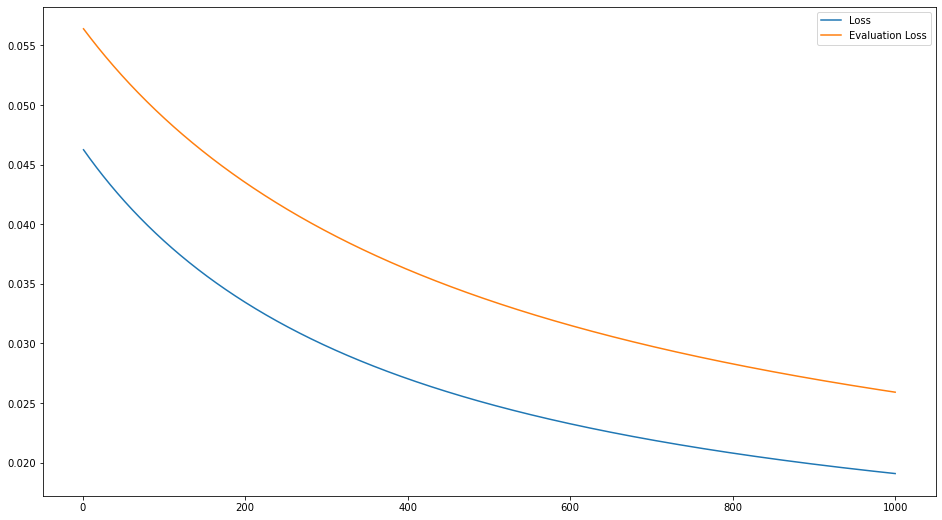

In [430]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(my_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(my_model.val_loss),label='Evaluation Loss',)
_ = plt.legend()

## Problem 7: Visualization of decision area
Visualise the decision area.

In [375]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


#### I will plot the decision boundary using logistic regression sklearn with 2 attributes for easier implementation

In [426]:
my_X = df.loc[:,["sl","pl"]]
my_Y = df.loc[:,"species"]
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.fit_transform(X_test)

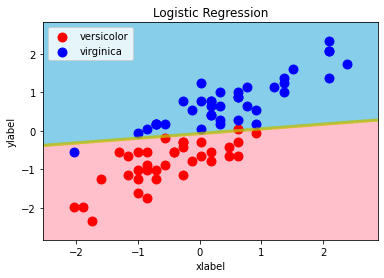

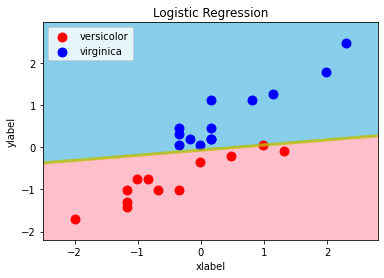

In [429]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0).fit(X_train_trans, y_train)
y_predict = lgr.predict(X_test_trans)
decision_region(X_train_trans,y_train,lgr,title="Logistic Regression")
decision_region(X_test_trans,y_predict,lgr,title="Logistic Regression")

## Problem 8: Saving weights
Let's save and load the learned weights for easy verification. Use the pickle module and NumPy's np.savez.

[pickle — Serialization of Python objects — Python 3.7.4 documentation](https://docs.python.org/3/library/pickle.html)

[numpy.savez — NumPy v1.17 Manual](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)

### Use Pickle 

In [282]:
with open(str("picke_weights") +'.pickle', 'wb') as handle:
    pickle.dump(my_model.getWeight(), handle)

In [324]:
with open(str("picke_weights") +'.pickle', 'rb') as handle:
    w = pickle.load(handle)
w

array([11.36898805,  1.36813324,  1.20688353, -0.46020166, -0.57843111])

### Use Numpy

In [322]:
np.savez("numpy_weights",my_weights=my_model.getWeight())

In [325]:
w = np.load("numpy_weights"+".npz")
print(w["my_weights"])

[11.36898805  1.36813324  1.20688353 -0.46020166 -0.57843111]
